In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
import matplotlib.pyplot as plt

data = pd.read_csv('C:/Users/Pyter/DA/BaiTap/Credit_Scoring.csv', encoding = "ISO-8859-1")
data

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
1,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0
2,11,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0.0
3,12,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2.0
4,13,0,0.010352,46,0,0.298354,12454.0,13,0,2,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149987,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149988,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149989,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149990,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [2]:
del data['Unnamed: 0']
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
1,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0
2,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0.0
3,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2.0
4,0,0.010352,46,0,0.298354,12454.0,13,0,2,0,2.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149992 entries, 0 to 149991
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149992 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149992 non-null  float64
 2   age                                   149992 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149992 non-null  int64  
 4   DebtRatio                             149992 non-null  float64
 5   MonthlyIncome                         120262 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149992 non-null  int64  
 7   NumberOfTimes90DaysLate               149992 non-null  int64  
 8   NumberRealEstateLoansOrLines          149992 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149992 non-null  int64  
 10  NumberOfDependents                    146068 non-null  float64
dtype

In [4]:
data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,149992.000000,149992.000000,149992.000000,149992.000000,149992.000000,1.202620e+05,149992.000000,149992.000000,149992.000000,149992.000000,146068.000000
mean,0.066837,6.048729,52.295516,0.421029,352.985824,6.669872e+03,8.452877,0.265981,1.018221,0.240399,0.757236
std,0.249740,249.762028,14.771902,4.192890,2037.824499,1.438414e+04,5.146006,4.169414,1.129704,4.155290,1.115103
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029863,41.000000,0.000000,0.175075,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154162,52.000000,0.000000,0.366516,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559012,63.000000,0.000000,0.868292,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


# Kiểm tra dữ liệu khuyết thiếu


In [5]:
for index, column in enumerate(data.columns):
    temp = data.loc[:,column].isna()
    if temp.sum() > 0:
        print('Cột', data.columns[index], 'chứa' , temp.sum() , 'giá trị KT')

Cột MonthlyIncome chứa 29730 giá trị KT
Cột NumberOfDependents chứa 3924 giá trị KT


# Thực hiện xử lý giá trị khuyết thiếu: Thay thế giá trị khuyết thiếu bằng giá trị nội suy theo các cột
# Thực hiện xử lý giá trị khuyết thiếu: Thay thế giá trị khuyết thiếu bằng giá trị 0

In [6]:
values = {'MonthlyIncome':'0'}
data.fillna(value=values, inplace=True)

In [7]:
data['NumberOfDependents'] = data['NumberOfDependents'].interpolate(inplace=False)

In [8]:
data['MonthlyIncome'] = data['MonthlyIncome'].astype('float64')

# Vẽ biểu đồ boxplot, biểu đồ phân bố dữ liệu cho các cột

In [10]:
def cat_price(data, cat_col):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
    sns.boxplot(data=data, x=cat_col, ax=ax1)
    sns.violinplot(y = data[cat_col], palette="coolwarm",ax=ax2)
    plt.tight_layout()

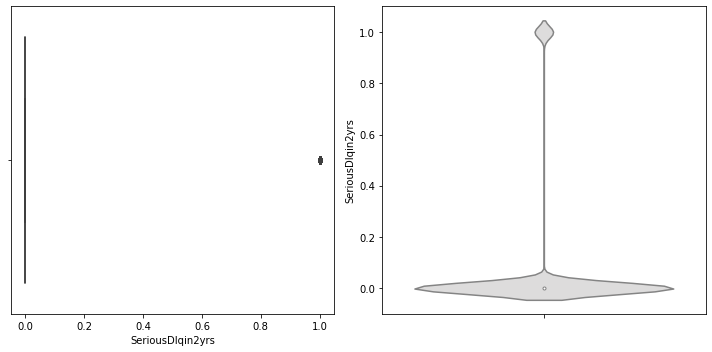

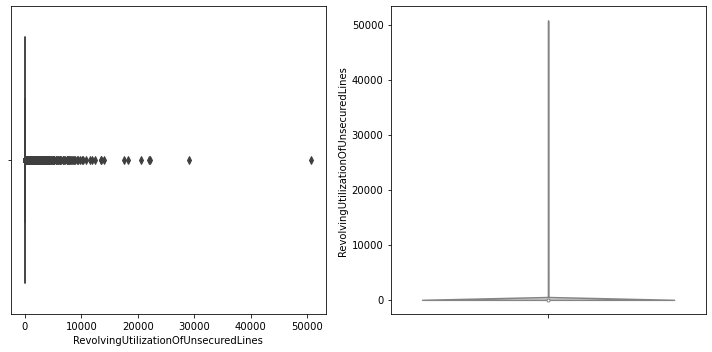

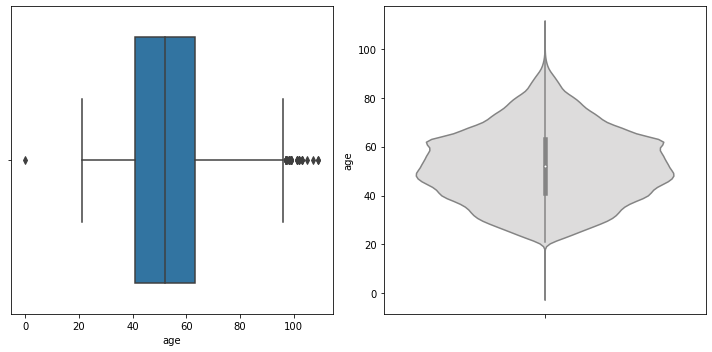

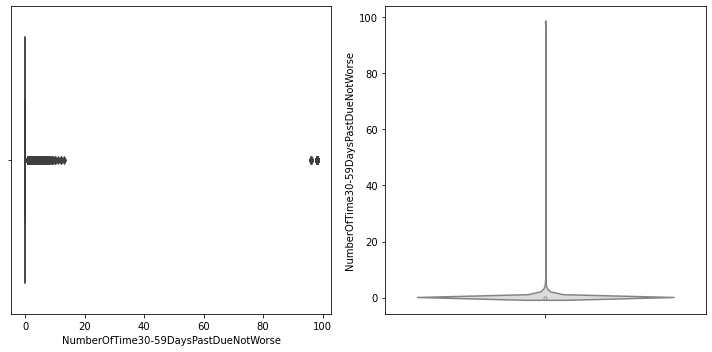

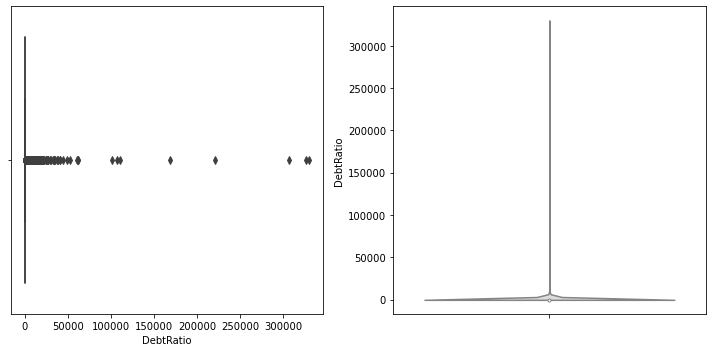

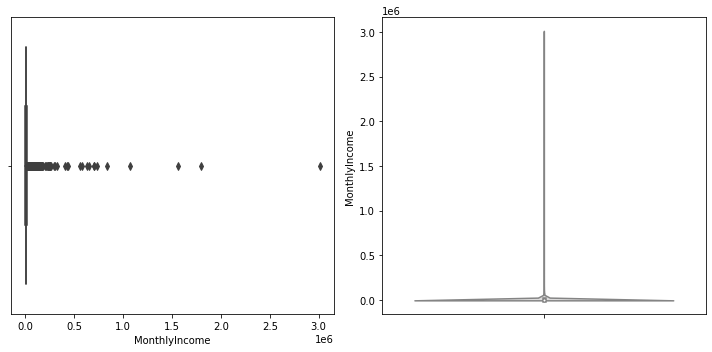

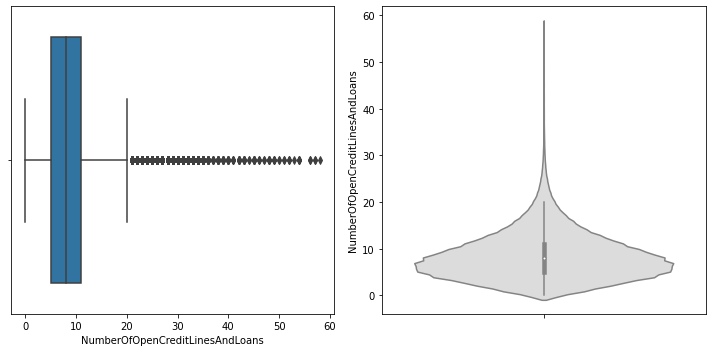

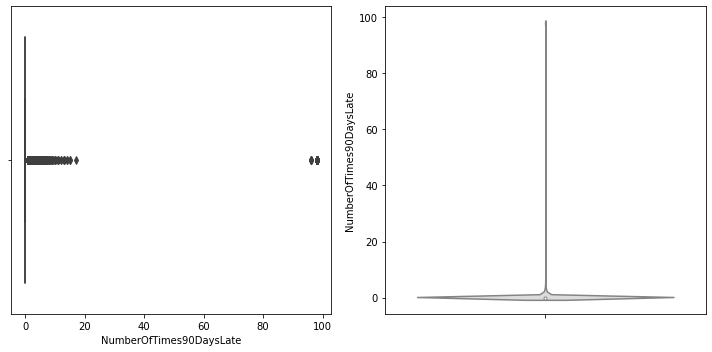

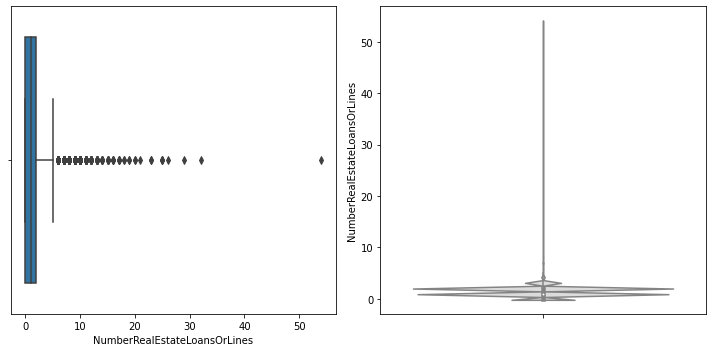

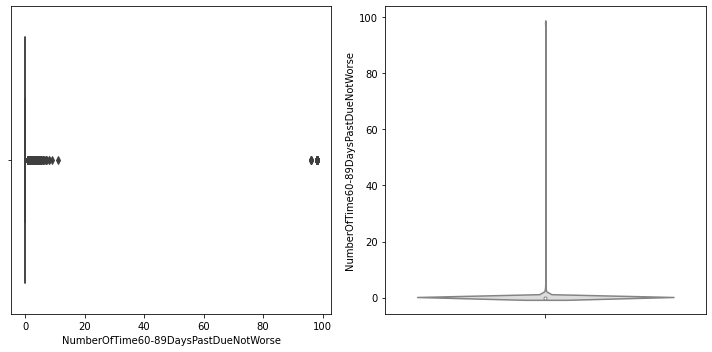

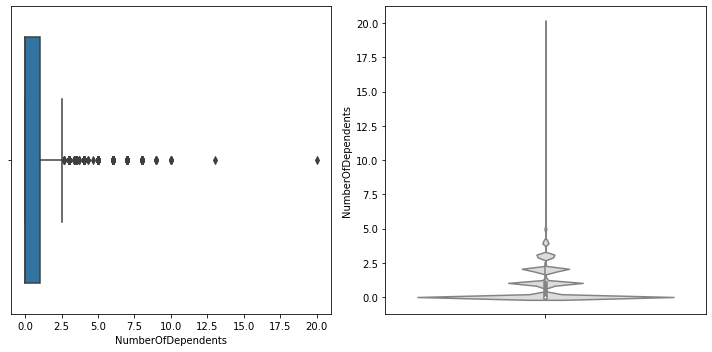

In [11]:
for i in data.columns:
    cat_price(data, i)

# Loại bỏ giá trị ngoại lai

In [12]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data1 = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f'Số giá trị ngoại lai bị bỏ đi là {data.shape[0]-data1.shape[0]}, \
Số dữ liệu còn lại là {data1.shape[0]}')

Số giá trị ngoại lai bị bỏ đi là 72756, Số dữ liệu còn lại là 77236


In [13]:
scaler = StandardScaler()
x_sc = scaler.fit_transform(data1)
data2 = pd.DataFrame(x_sc, columns=data1.columns)
data2

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.0,1.199401,-1.493014,0.0,-0.027846,-0.984088,-0.711415,0.0,-0.990213,0.0,-0.70255
1,0.0,-0.774037,-0.126439,0.0,0.761659,0.223165,-0.246593,0.0,1.127499,0.0,1.98231
2,0.0,-0.800688,-0.451814,0.0,-0.067390,2.019409,1.147874,0.0,1.127499,0.0,1.98231
3,0.0,0.897221,0.719537,0.0,-0.381917,1.689912,-0.246593,0.0,0.068643,0.0,1.98231
4,0.0,-0.308669,0.003711,0.0,-0.458778,0.916860,-0.246593,0.0,-0.990213,0.0,-0.70255
...,...,...,...,...,...,...,...,...,...,...,...
77231,0.0,0.383797,-0.191514,0.0,0.309273,-0.712524,-0.246593,0.0,-0.990213,0.0,-0.70255
77232,0.0,-0.705012,1.370287,0.0,-0.327734,-1.104783,-0.943826,0.0,0.068643,0.0,-0.70255
77233,0.0,0.112447,-0.581964,0.0,1.419542,-0.053529,-0.943826,0.0,0.068643,0.0,1.98231
77234,0.0,-0.833352,-1.493014,0.0,-1.128184,-0.013700,-0.943826,0.0,-0.990213,0.0,-0.70255


# Chia dữ liệu ở các cột thành 4,5,6 nhóm có số lượng phần tử bằng nhau và đếm số lượng phần tử ở mỗi nhóm, lấy ra khoảng giữ liệu của mỗi nhóm.

In [14]:
for i in data1.columns:
    data1['group4'] = pd.cut(data1[f'{i}'], 4)
    data1['group5'] = pd.cut(data1[f'{i}'],5)
    data1['group6'] = pd.cut(data1[f'{i}'],6)

C:\Users\Pyter\AppData\Local\Temp\ipykernel_17964\2333511271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['group4'] = pd.cut(data1[f'{i}'], 4)
C:\Users\Pyter\AppData\Local\Temp\ipykernel_17964\2333511271.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['group5'] = pd.cut(data1[f'{i}'],5)
C:\Users\Pyter\AppData\Local\Temp\ipykernel_17964\2333511271.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [20]:
print(data1['group4'].value_counts())
print(data1['group5'].value_counts())
print(data1['group6'].value_counts())

(-0.0025, 0.625]    48658
(0.625, 1.25]       16747
(1.875, 2.5]        11780
(1.25, 1.875]          51
Name: group4, dtype: int64
(-0.0025, 0.5]    48658
(0.5, 1.0]        16747
(1.5, 2.0]        11773
(1.0, 1.5]           51
(2.0, 2.5]            7
Name: group5, dtype: int64
(-0.0025, 0.417]    48589
(0.833, 1.25]       16744
(1.667, 2.083]      11773
(0.417, 0.833]         72
(1.25, 1.667]          51
(2.083, 2.5]            7
Name: group6, dtype: int64


# Chia dữ liệu ở các cột age và MonthlyIncome thành 5 nhóm theo các khoảng: 0, 30, 40, 50, 80, 150 và đếm số lượng phần tử ở mỗi nhóm.

In [16]:
bins = [0, 30, 40, 50, 80, 150]
age = pd.cut(data1['age'], bins)
pd.value_counts(age)

(50, 80]     39967
(40, 50]     15951
(30, 40]     12384
(0, 30]       6041
(80, 150]     2893
Name: age, dtype: int64

In [17]:
MonthlyIncome = pd.cut(data1['MonthlyIncome'], bins)
pd.value_counts(MonthlyIncome)

(0, 30]      41
(80, 150]    15
(30, 40]      1
(50, 80]      1
(40, 50]      0
Name: MonthlyIncome, dtype: int64